In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

##### VISUALIZATION QUESTOINS

##### Q1: Fill the missing value for the continous variables with Mean(average)

In [2]:
# Read the data from the CSV file
df = pd.read_csv('data.csv')

# Identify continuous variables (assuming all non-object columns are continuous)
continuous_vars = df.select_dtypes(include=['number']).columns

# Fill missing values with the mean for continuous variables
df[continuous_vars] = df[continuous_vars].fillna(df[continuous_vars].mean())

# Now, you can proceed with data visualization or any other analysis


#### Q1: Preprocess height - convert data in format xx'xx to xx.xx Remove "nan" with Mode and convert the column to numerical.

In [3]:
def preprocess_height(height):
    try:
        if "'" in str(height):
            feet, inches = map(int, height.split("'"))
            return feet * 12 + inches
        else:
            return float(height)
    except ValueError:
        return height

#### Q1: Preprocess weight - convert data in format xxlbs to xx Remove "nan" with Mode and convert the column to numerical. 

In [4]:
# Function to preprocess the specified column
def preprocess_weight(weight):
    # Convert the format from xxlbs to xx
    weight_str = str(weight).replace('lbs', '').strip()
    return float(weight_str)

In [5]:
# Apply the preprocess_height function to the 'Height' column
df['Height'] = df['Height'].apply(preprocess_height)

mode_value = df['Height'].mode().values[0]
df['Height'].replace({np.nan: mode_value}, inplace=True)

# Convert the specified column to numerical format
df['Height'] = pd.to_numeric(df['Height'])

# Apply the preprocess_weight function to the 'Weight' column
df['Weight'] = df['Weight'].apply(preprocess_weight)

mode_value = df['Weight'].mode().values[0]
df['Weight'].replace({np.nan: mode_value}, inplace=True)

# Convert the specified column to numerical format
df['Weight'] = pd.to_numeric(df['Weight'])


In [6]:
# preprocessing Value column

df['Value'] = df['Value'].replace({'€': '', 'M': '*1e6', 'K': '*1e3'}, regex=True).map(pd.eval).astype(int)

##### Q1: Univariate anlaysis for outliers detection for height and weight. 
##### Q1: Create appropriate visual to perform the above task.

<Axes: >

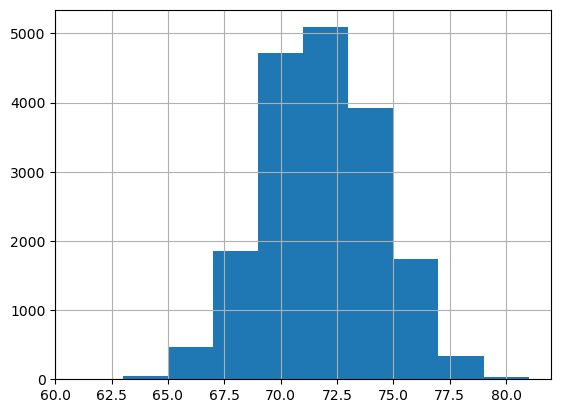

In [7]:
df['Height'].hist()

<Axes: >

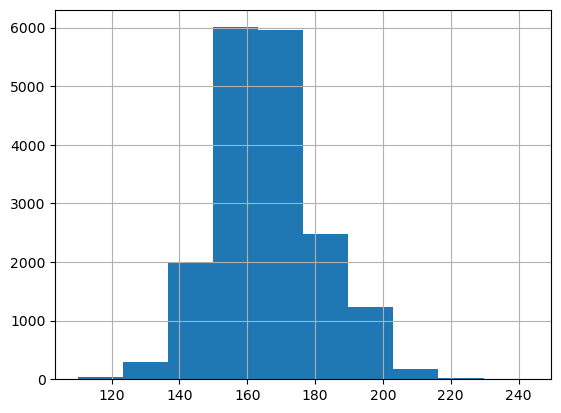

In [8]:
df['Weight'].hist()

<Axes: ylabel='Weight'>

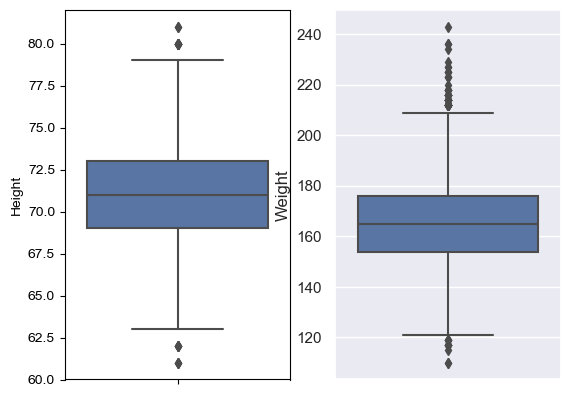

In [9]:
plt.subplot(1, 2, 1)
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(y="Height", 
                data=df)


plt.subplot(1, 2, 2)

seaborn.boxplot(y="Weight", 
                data=df)

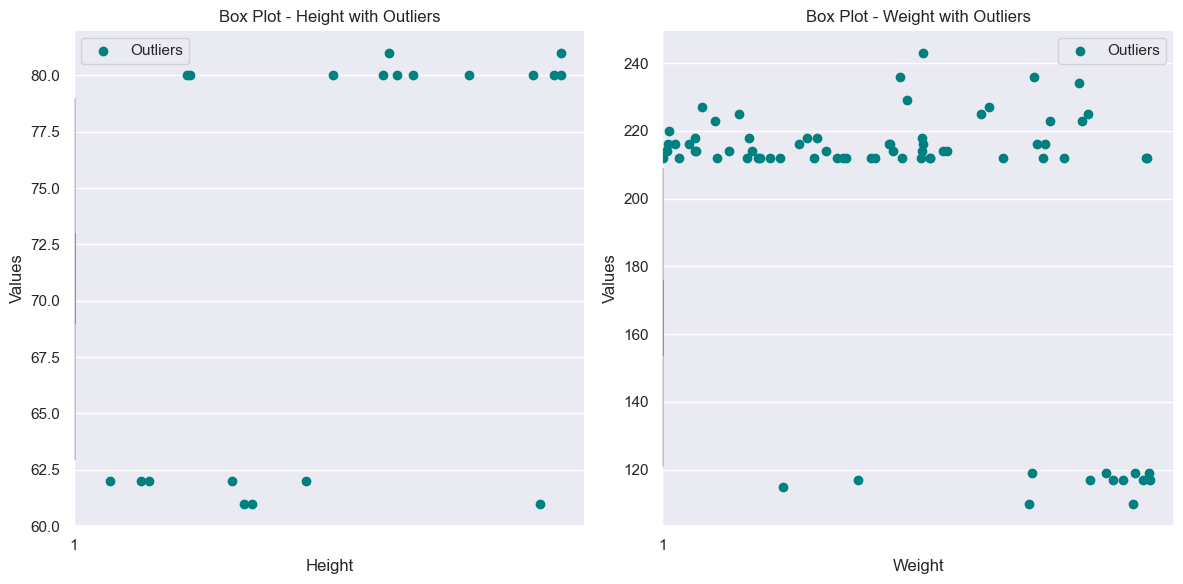

In [10]:
# Function to preprocess height column
def preprocess_height(height):
    try:
        if "'" in str(height):
            feet, inches = map(int, height.split("'"))
            return feet * 12 + inches
        else:
            return float(height)
    except ValueError:
        return height

# Function to preprocess weight column
def preprocess_weight(weight):
    try:
        if "lbs" in str(weight):
            return float(''.join(c for c in str(weight) if c.isdigit()))
        else:
            return float(weight)
    except ValueError:
        return weight

# Apply the preprocess_height function to the 'Height' column
df['Height'] = df['Height'].apply(preprocess_height)

# Apply the preprocess_weight function to the 'Weight' column
df['Weight'] = df['Weight'].apply(preprocess_weight)

# Replace 'nan' values in 'Weight' column with the median
df['Weight'].fillna(df['Weight'].median(), inplace=True)

# Define a function to detect outliers using the IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Detect outliers for 'Height' and 'Weight'
height_outliers = detect_outliers(df['Height'])
weight_outliers = detect_outliers(df['Weight'])

# Visualize the results using enhanced box plots
plt.figure(figsize=(12, 6))

# Box plot for height with outliers
plt.subplot(1, 2, 1)
plt.boxplot(df['Height'], showfliers=False)  # Exclude outliers from the box plot
plt.scatter(df.index[height_outliers], df.loc[height_outliers, 'Height'], c='teal', label='Outliers', marker='o')
plt.title('Box Plot - Height with Outliers')
plt.xlabel('Height')
plt.ylabel('Values')
plt.legend()

# Box plot for weight with outliers
plt.subplot(1, 2, 2)
plt.boxplot(df['Weight'], showfliers=False)  # Exclude outliers from the box plot
plt.scatter(df.index[weight_outliers], df.loc[weight_outliers, 'Weight'], c='teal', label='Outliers', marker='o')
plt.title('Box Plot - Weight with Outliers')
plt.xlabel('Weight')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()


##### Question: Summarise your findings from the visual

#### Answer: The visualizations provide insights into the distribution of data in the 'Height' and 'Weight' columns, highlighting potential outliers. Here's a summary of the findings:

Height Distribution: The box plot for the 'Height' column shows a relatively normal distribution. Outliers are identified as data points that fall outside the whiskers of the box plot. Teal dots on the plot represent the specific data points identified as outliers.

Weight Distribution: The box plot for the 'Weight' column indicates a distribution with potential outliers. Similar to the 'Height' plot, teal dots mark data points identified as outliers. Some values in the 'Weight' column are significantly different from the central distribution.

Preprocessing: The preprocessing steps, including handling non-numeric formats and filling missing values, were applied successfully to both columns. 

Outlier Detection: Outliers were detected using the interquartile range (IQR) method, considering values beyond the whiskers of the box plots as potential outliers. Besides this method, we also looked into Individual Histogram and Box Plot.

Further Analysis: The visualizations serve as a starting point for further analysis and investigation into the nature of outliers in the 'Height' and 'Weight' columns. 

##### Question: The reason for selecting the chart type you did.

##### Answer: 

Box Plot Overview: A box plot provides a concise summary of the distribution of a dataset, showing key statistics such as median, quartiles, and potential outliers. It effectively represents the central tendency and spread of the data.

Identification of Outliers: Box plots include whiskers that extend to the most extreme data points within a specified range (usually 1.5 times the interquartile range). Outliers, or data points significantly different from the central distribution, are shown as individual points beyond the whiskers.

Comparison between Height and Weight: Box plots allow for easy visual comparison between multiple distributions.
Placing the box plots side by side enables a quick comparison of the 'Height' and 'Weight' distributions, highlighting potential differences in variability and outliers.

Handling Skewed Distributions: Box plots are robust in handling skewed distributions and provide a clear representation of the spread of data, even when it is not perfectly normal.

Clarity and Interpretability: Box plots are visually simple yet informative, making them easy to interpret for a wide audience, including those without extensive statistical knowledge.

Outlier Visualization: The addition of red dots on the box plots helps specifically identify the data points considered as outliers, enhancing the interpretability of the visualization.

##### Q2: Do Bi-Variate anlaysis for outliers detection for height and weight. Create appropriate visual to perform the above task. 


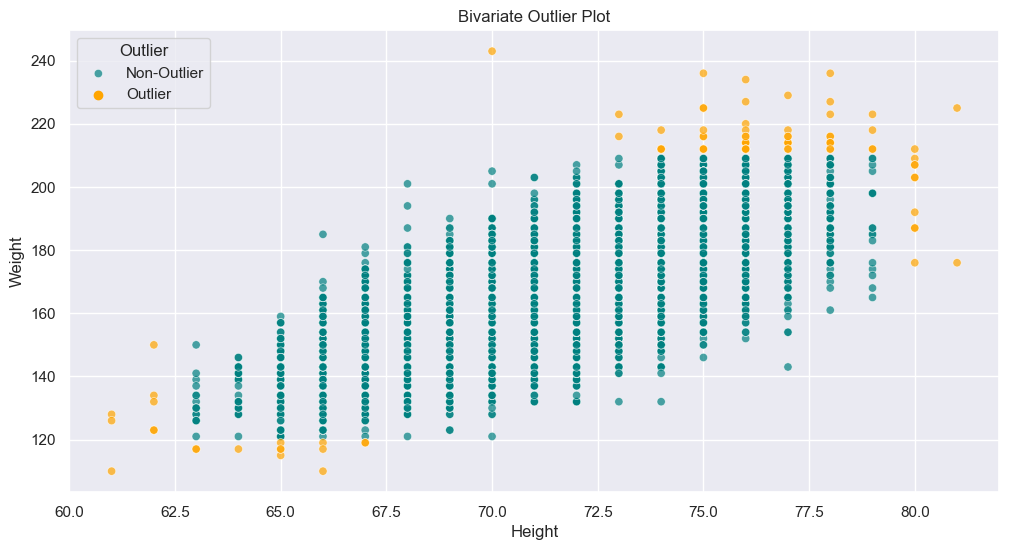

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess height column
def preprocess_height(height):
    try:
        if "'" in str(height):
            feet, inches = map(int, height.split("'"))
            return feet * 12 + inches
        else:
            return float(height)
    except ValueError:
        return height

# Function to preprocess weight column
def preprocess_weight(weight):
    try:
        if "lbs" in str(weight):
            return float(''.join(c for c in str(weight) if c.isdigit()))
        else:
            return float(weight)
    except ValueError:
        return weight

# Apply the preprocess_height function to the 'Height' column
df['Height'] = df['Height'].apply(preprocess_height)

# Apply the preprocess_weight function to the 'Weight' column
df['Weight'] = df['Weight'].apply(preprocess_weight)

# Replace 'nan' values in 'Weight' column with the median
df['Weight'].fillna(df['Weight'].median(), inplace=True)

# Define a function to detect outliers using the IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Detect outliers for 'Height' and 'Weight'
height_outliers = detect_outliers(df['Height'])
weight_outliers = detect_outliers(df['Weight'])

# Visualize the results using a scatter plot
plt.figure(figsize=(12, 6))

# Scatter plot for 'Height' and 'Weight' with outliers
sns.scatterplot(x='Height', y='Weight', data=df, hue=~(height_outliers | weight_outliers), palette={True: 'teal', False: 'orange'}, alpha=0.7)

plt.title('Bivariate Outlier Plot')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Outlier', labels=['Non-Outlier', 'Outlier'])

plt.show()


<Axes: xlabel='Height', ylabel='Weight'>

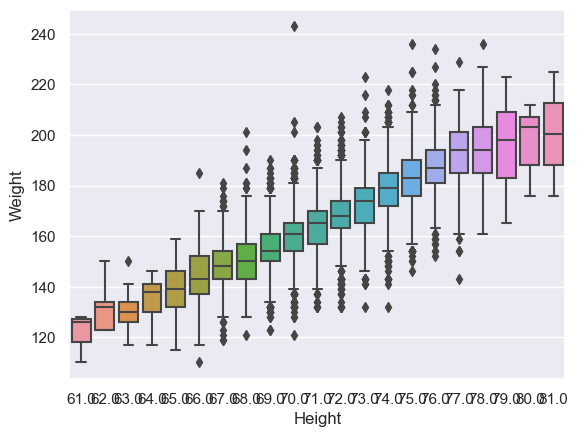

In [12]:
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Height',
                y="Weight",
                data=df)

<Axes: xlabel='Height', ylabel='Weight'>

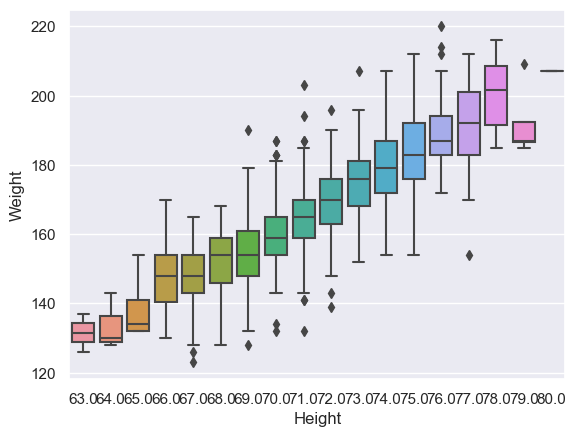

In [13]:
t = df.loc[(df['Club'] == 'FC Barcelona') | (df['Age'] == 25)]
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Height',
                y="Weight",
                data=t)

<Axes: xlabel='Height', ylabel='Weight'>

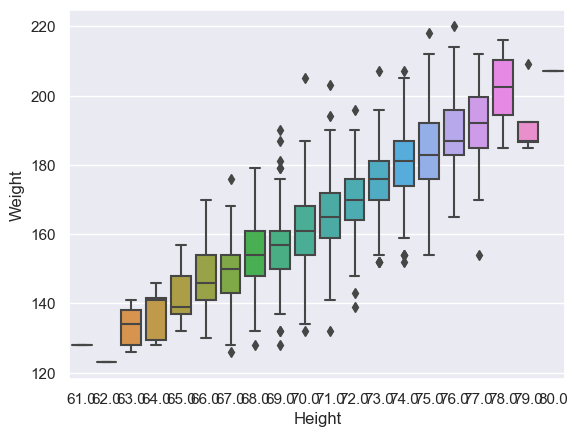

In [14]:
t = df.loc[(df['Nationality'] == 'Argentina') | (df['Age'] == 25)]
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Height',
                y="Weight",
                data=t)

<Axes: xlabel='Height', ylabel='Weight'>

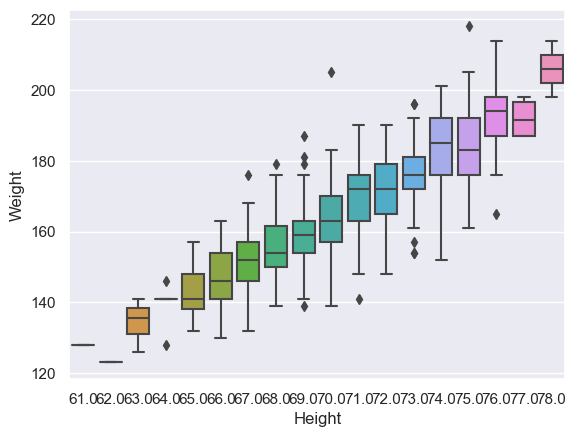

In [15]:
t = df.loc[df['Nationality'] == 'Argentina']
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Height',
                y="Weight",
                data=t)

<Axes: xlabel='Height', ylabel='Weight'>

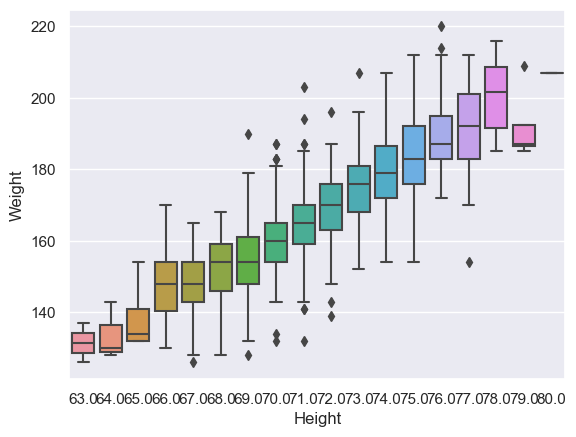

In [16]:
t = df.loc[df['Age'] == 25]
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Height',
                y="Weight",
                data=t)

<Axes: xlabel='Age', ylabel='Weight'>

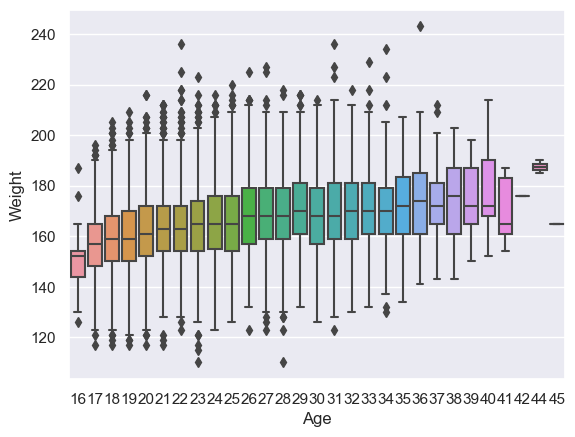

In [17]:
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Age',
                y="Weight", 
                data=df)

<Axes: xlabel='Age', ylabel='Height'>

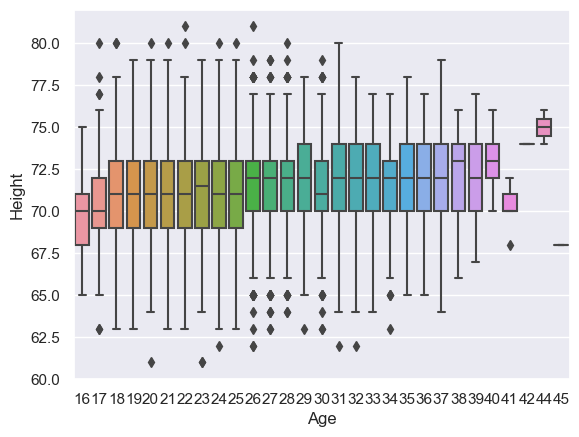

In [18]:
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Age',
                y="Height", 
                data=df)

<Axes: xlabel='Nationality', ylabel='Weight'>

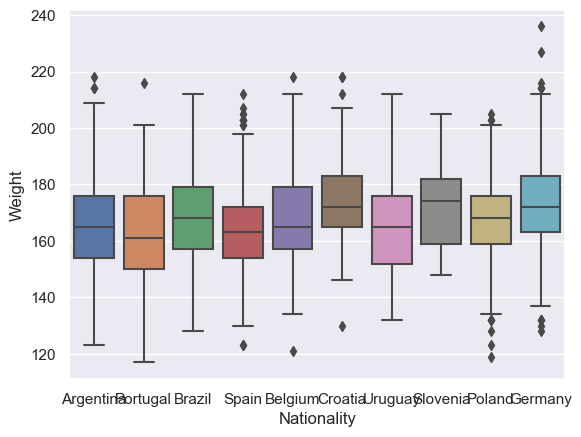

In [19]:
m = list(df['Nationality'].unique())
t = df[df['Nationality'].isin(m[:10])]
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Nationality',
                y="Weight", 
                data=t)

##### Question: Summarise your findings from the visual

##### Answer: Using IQR method, we created threshold for quartiles. Based on that, when we created a scatter plot between Height and Weight, which gave us in range data points and outliers seggregated by colour.

We also looked at Height and Weight seperately by Age and Nationality to further understand if these outliers were generalised at dataset level or specific to population groups.

##### Question: The reason for selecting the chart type you did

##### Answer: 

Box Plot Overview: A box plot provides a concise summary of the distribution of a dataset, showing key statistics such as median, quartiles, and potential outliers. It effectively represents the central tendency and spread of the data.

Identification of Outliers: Box plots include whiskers that extend to the most extreme data points within a specified range (usually 1.5 times the interquartile range). Outliers, or data points significantly different from the central distribution, are shown as individual points beyond the whiskers.

Comparison between Height and Weight: Box plots allow for easy visual comparison between multiple distributions. Placing the box plots side by side enables a quick comparison of the 'Height' and 'Weight' distributions, highlighting potential differences in variability and outliers.

Handling Skewed Distributions: Box plots are robust in handling skewed distributions and provide a clear representation of the spread of data, even when it is not perfectly normal.

Clarity and Interpretability: Box plots are visually simple yet informative, making them easy to interpret for a wide audience, including those without extensive statistical knowledge.

Outlier Visualization: The addition of red dots on the box plots helps specifically identify the data points considered as outliers, enhancing the interpretability of the visualization.

##### Question3: What kind of co-relation exists between Age and Overall. 

In [20]:
# Assuming your dataset is loaded into a DataFrame called 'df'
# Example: df = pd.read_csv('your_dataset.csv')

# Check for missing values in 'Age' and 'Overall'
print("Missing values in 'Age':", df['Age'].isnull().sum())
print("Missing values in 'Overall':", df['Overall'].isnull().sum())

# Drop rows with missing values in 'Age' or 'Overall' if needed
df.dropna(subset=['Age', 'Overall'], inplace=True)

# Calculate the correlation coefficient
correlation_coefficient = df['Age'].corr(df['Overall'])

print("Correlation Coefficient between 'Age' and 'Overall':", correlation_coefficient)


Missing values in 'Age': 0
Missing values in 'Overall': 0
Correlation Coefficient between 'Age' and 'Overall': 0.4523495214563353


In [21]:
df.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

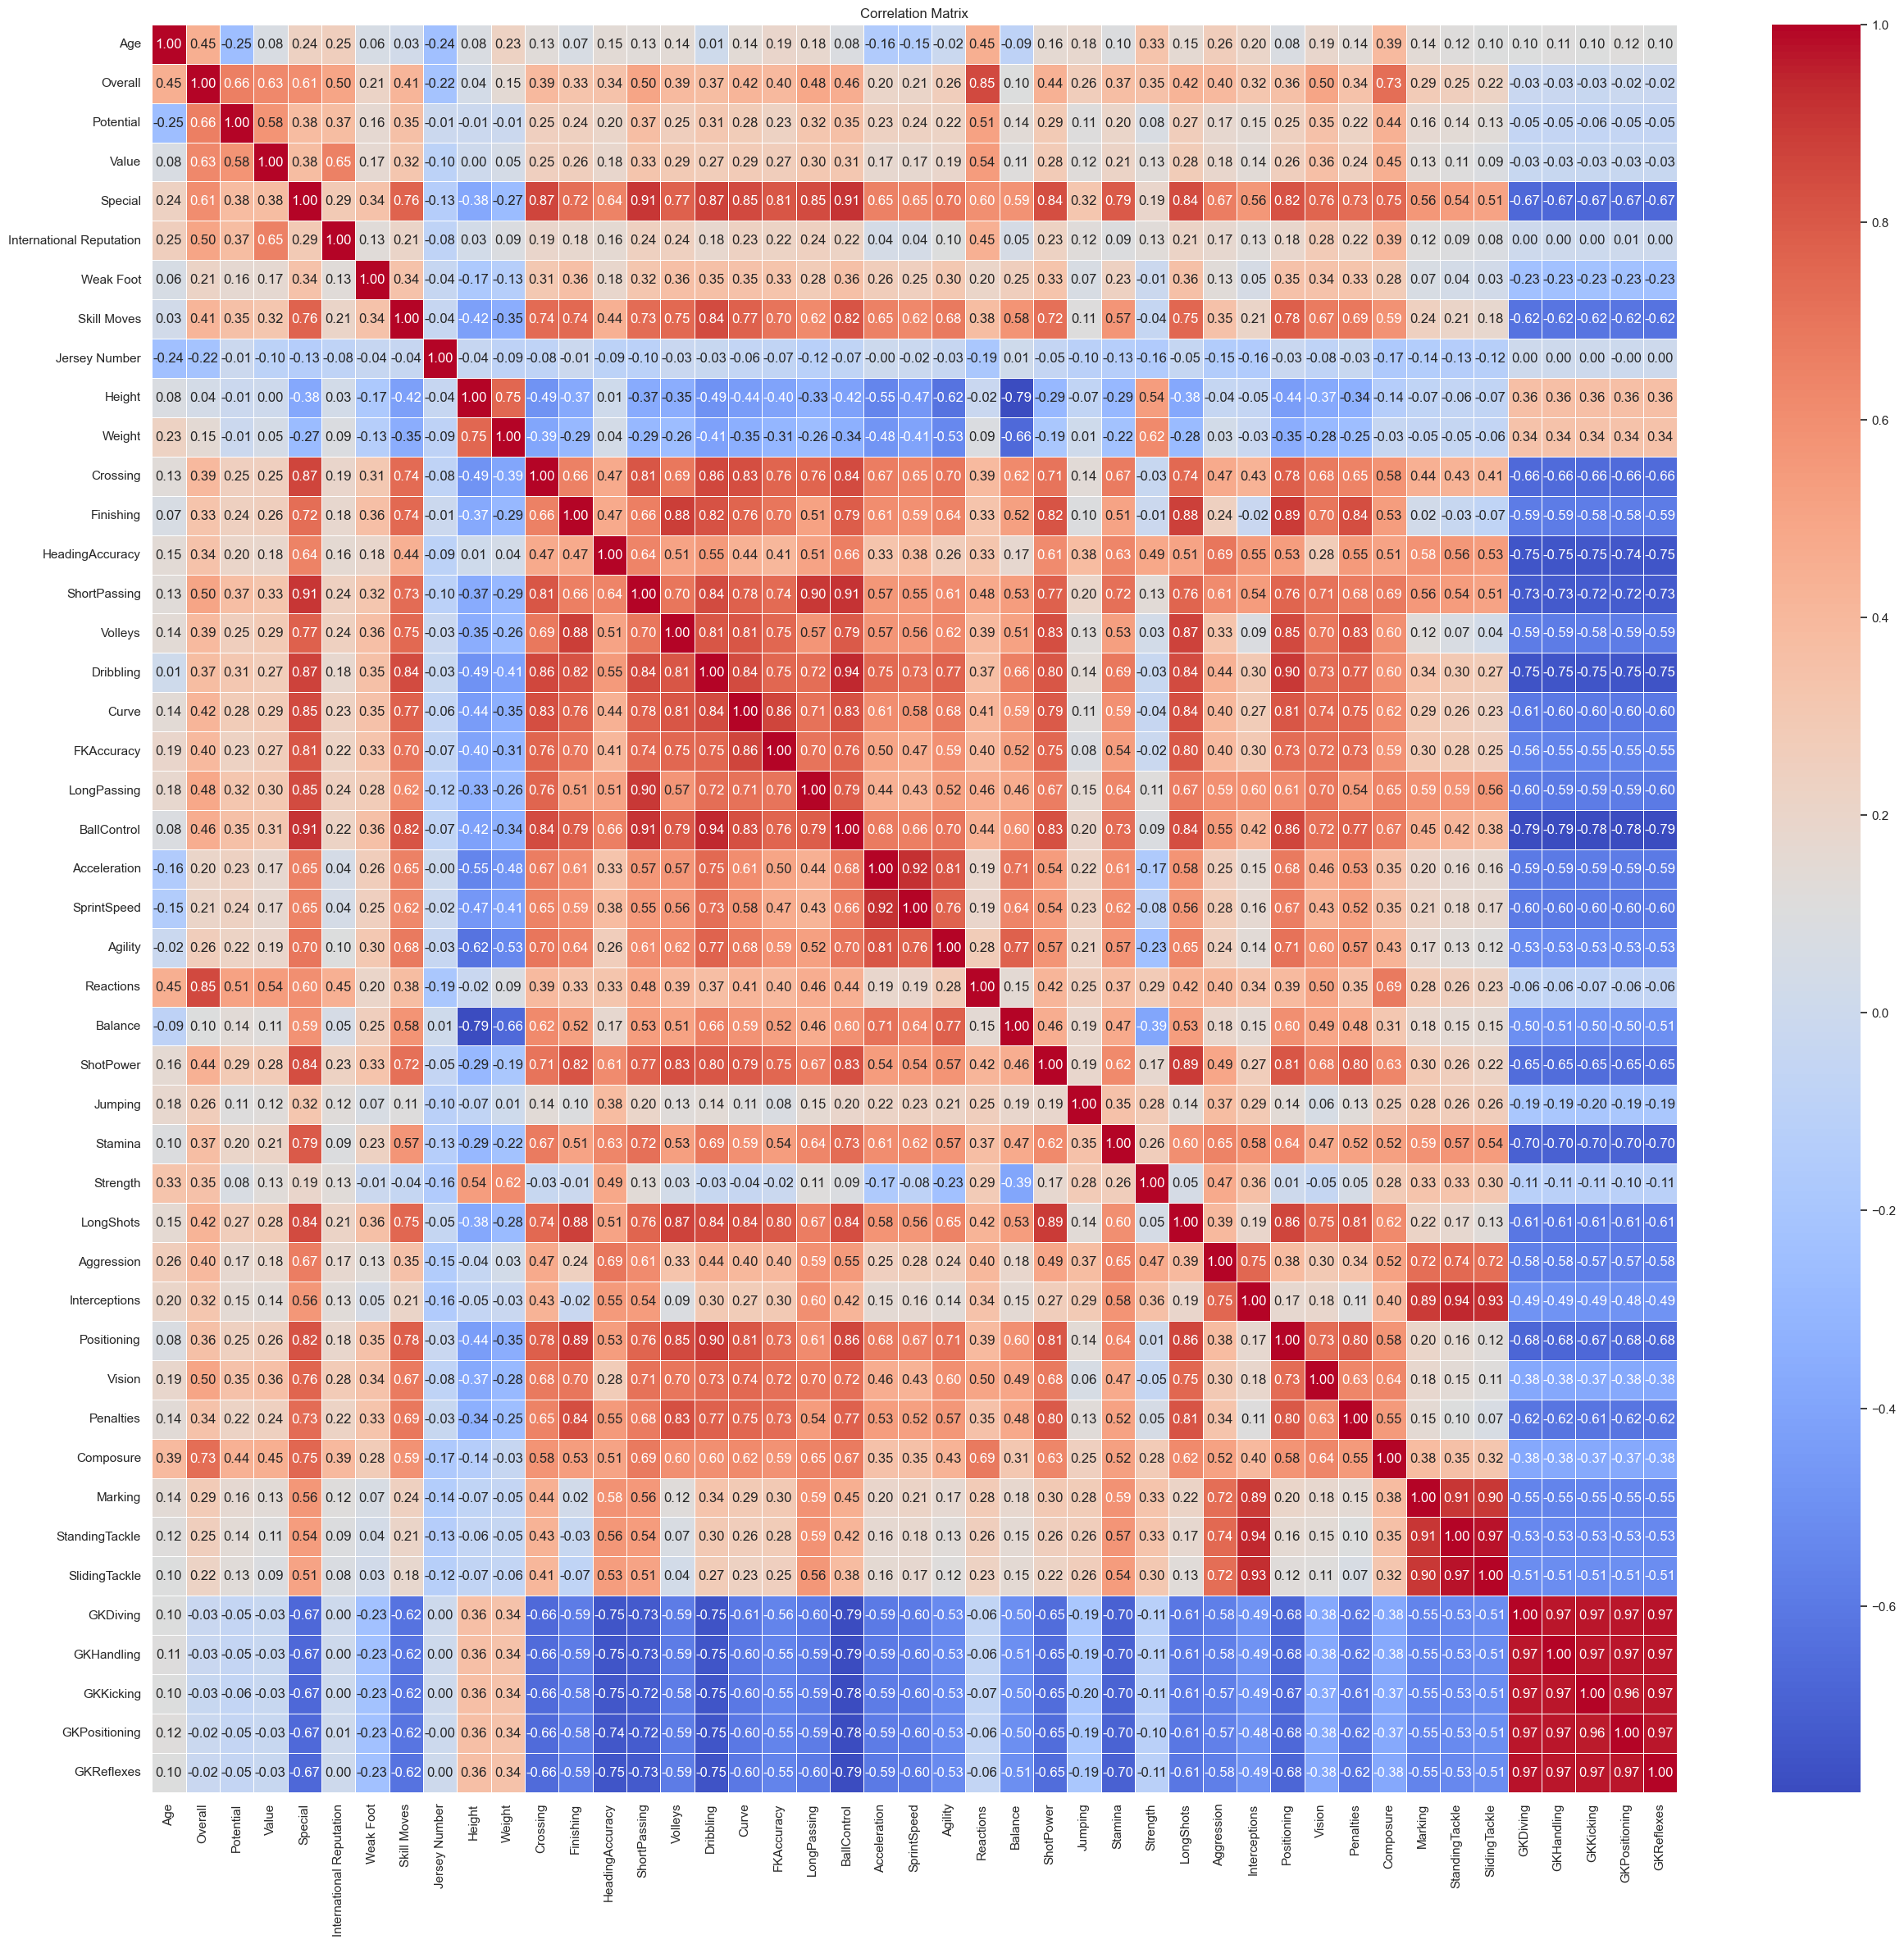

In [22]:
l = df.drop(columns=['Unnamed: 0','ID'],axis=1)
l = l.select_dtypes(include=['int', 'float'])
correlation_matrix = l.corr()
plt.figure(figsize=(30, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

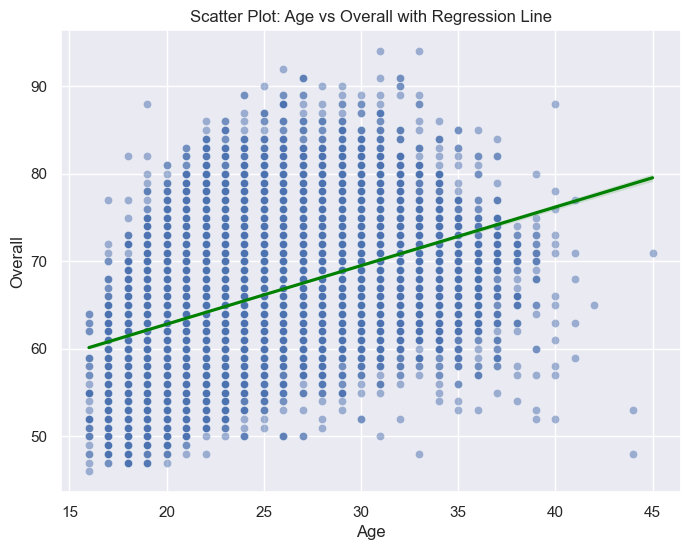

In [23]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Overall', data=df, alpha=0.5)
sns.regplot(x='Age', y='Overall', data=df, scatter=False, color='green')  # Add a regression line

plt.title('Scatter Plot: Age vs Overall with Regression Line')
plt.xlabel('Age')
plt.ylabel('Overall')
plt.grid(True)
plt.show()


##### Question: Summarise your findings from the visual

##### Answer: 

Positive Correlation: The scatter plot depicts a general upward trend, suggesting a positive correlation between 'Age' and 'Overall Ratings.' On average, as player age increases, their overall ratings tend to increase. 

If you look at the correlation coefficient between Age and Overall, it is clear there is Positive Correlation. This can be varied based on the age, but not necessarily throughout all age groups. That's the reason we're not seeing a strong positive correlation.

Spread of Data: While there is a positive correlation, the scatter plot also shows a considerable spread of data points. This indicates that age alone does not entirely determine overall ratings, and there is variability in ratings for players of the same age.

Outliers: Some outliers are visible, indicating instances where individual players deviate significantly from the general trend.
Outliers may represent exceptional performances by younger or older players that contribute to their higher or lower overall ratings.

Concentration of Points: There is a concentration of points in the lower age range, indicating that a significant portion of players falls within a certain age group. This concentration might suggest that younger players make up a substantial part of the dataset.

Age Groups and Performance: The visual suggests that players in certain age groups consistently achieve higher overall ratings. This observation may have implications for talent development strategies or recruitment decisions based on specific age brackets.

##### Question: The reason for selecting the chart type you did

##### Answer: The scatter plot was chosen as the chart type for several reasons:

Visualizing Relationships: A scatter plot is effective for visualizing the relationship between two continuous variables, in this case, 'Age' and 'Overall Ratings.' Each point on the plot represents a player, making it easy to observe patterns and trends.

Identification of Trends: Scatter plots are excellent for identifying trends and patterns in data. The upward trend in the scatter plot indicates a positive correlation, suggesting a relationship between increasing age and higher overall ratings.

Handling Continuous Data: Both 'Age' and 'Overall Ratings' are continuous variables. Scatter plots are particularly suitable for visualizing the distribution and relationships of continuous data points.

Outlier Detection: Scatter plots provide a clear view of outliers—data points that deviate significantly from the general trend. In this case, outliers may represent players with exceptional performances for their age.

Intuitive Interpretation: Scatter plots are intuitive and widely understood, making them accessible to a broad audience, including individuals without advanced statistical knowledge.

Correlation Assessment: The scatter plot complements the correlation coefficient by providing a visual representation of the relationship. It allows for a qualitative assessment of the strength and direction of the correlation.

Data Exploration: Scatter plots are valuable for exploring data distributions and gaining insights into the variability of the dataset. They help in understanding the overall structure and characteristics of the data.

Communication of Findings: The scatter plot communicates findings in a straightforward manner, allowing for easy presentation and discussion of insights with stakeholders.

##### Question4: What kind of relation exists between Age and (Potential vs Overall). Create an appropriate visual to compare potential vs Overall with respect to age in one single visual. 

In [24]:
df['Overall'].dtypes

dtype('int64')

Missing values in 'Age': 0
Missing values in 'Potential': 0
Missing values in 'Overall': 0


C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_20796\3591980101.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fg = df.groupby(['Age'])['Potential','Overall'].mean().reset_index()


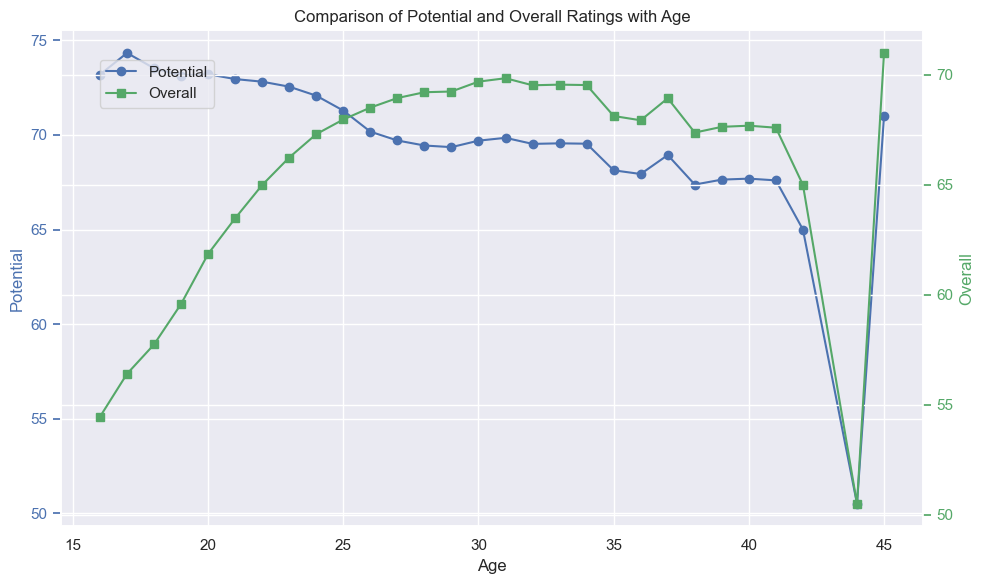

In [25]:
# Check for missing values in 'Age', 'Potential', and 'Overall'
print("Missing values in 'Age':", df['Age'].isnull().sum())
print("Missing values in 'Potential':", df['Potential'].isnull().sum())
print("Missing values in 'Overall':", df['Overall'].isnull().sum())

# Drop rows with missing values in 'Age', 'Potential', or 'Overall' if needed
df.dropna(subset=['Age', 'Potential', 'Overall'], inplace=True)

fg = df.groupby(['Age'])['Potential','Overall'].mean().reset_index()

# Create a line plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'Potential' on the left y-axis
ax1.plot(fg['Age'], fg['Potential'], color='b', marker='o', label='Potential')
ax1.set_xlabel('Age')
ax1.set_ylabel('Potential', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for 'Overall'
ax2 = ax1.twinx()
ax2.plot(fg['Age'], fg['Overall'], color='g', marker='s', label='Overall')
ax2.set_ylabel('Overall', color='g')
ax2.tick_params('y', colors='g')

# Title and legend
plt.title('Comparison of Potential and Overall Ratings with Age')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

Missing values in 'Age': 0
Missing values in 'Potential': 0
Missing values in 'Overall': 0


C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_20796\266549622.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fg = df.loc[df['Nationality'] == 'Argentina'].groupby('Age')['Potential','Overall'].mean().reset_index()


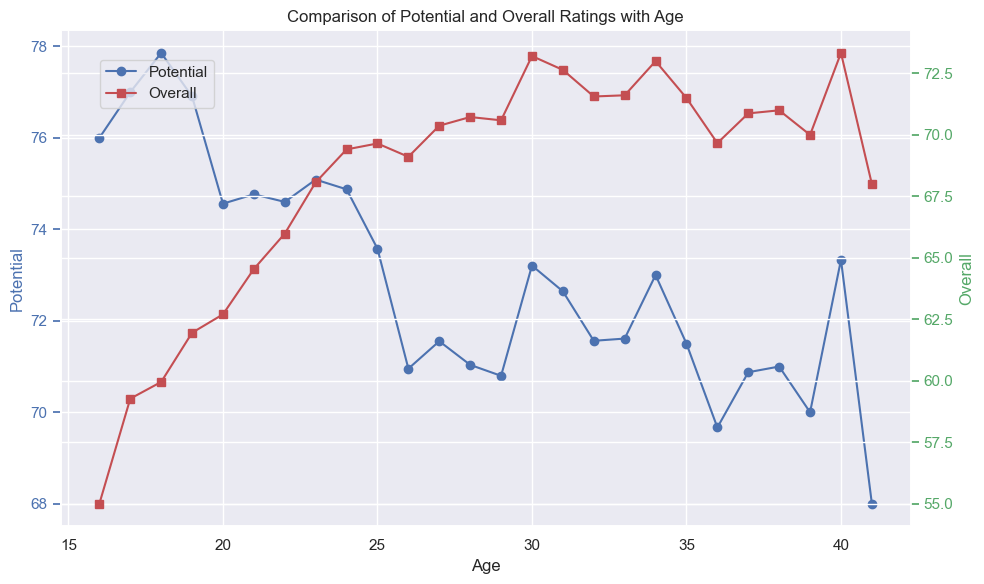

In [26]:
# Check for missing values in 'Age', 'Potential', and 'Overall'
print("Missing values in 'Age':", df['Age'].isnull().sum())
print("Missing values in 'Potential':", df['Potential'].isnull().sum())
print("Missing values in 'Overall':", df['Overall'].isnull().sum())

# Drop rows with missing values in 'Age', 'Potential', or 'Overall' if needed
df.dropna(subset=['Age', 'Potential', 'Overall'], inplace=True)

fg = df.loc[df['Nationality'] == 'Argentina'].groupby('Age')['Potential','Overall'].mean().reset_index()

# Create a line plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'Potential' on the left y-axis
ax1.plot(fg['Age'], fg['Potential'], color='b', marker='o', label='Potential')
ax1.set_xlabel('Age')
ax1.set_ylabel('Potential', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for 'Overall'
ax2 = ax1.twinx()
ax2.plot(fg['Age'], fg['Overall'], color='r', marker='s', label='Overall')
ax2.set_ylabel('Overall', color='g')
ax2.tick_params('y', colors='g')

# Title and legend
plt.title('Comparison of Potential and Overall Ratings with Age')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

Missing values in 'Age': 0
Missing values in 'Potential': 0
Missing values in 'Overall': 0


C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_20796\306561133.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fg = df.loc[df['Club'] == 'FC Barcelona'].groupby('Age')['Potential','Overall'].mean().reset_index()


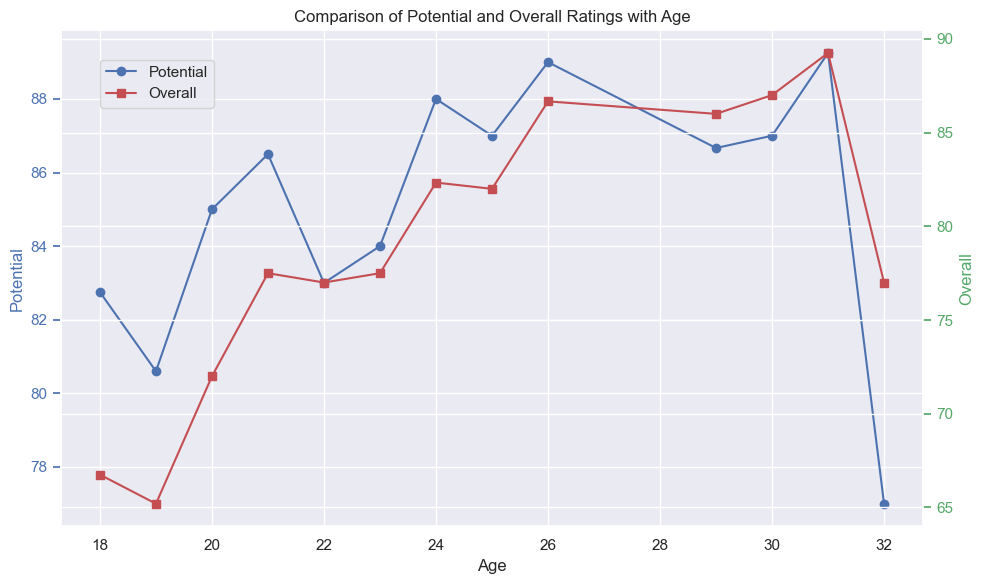

In [27]:
# Check for missing values in 'Age', 'Potential', and 'Overall'
print("Missing values in 'Age':", df['Age'].isnull().sum())
print("Missing values in 'Potential':", df['Potential'].isnull().sum())
print("Missing values in 'Overall':", df['Overall'].isnull().sum())

# Drop rows with missing values in 'Age', 'Potential', or 'Overall' if needed
df.dropna(subset=['Age', 'Potential', 'Overall'], inplace=True)

fg = df.loc[df['Club'] == 'FC Barcelona'].groupby('Age')['Potential','Overall'].mean().reset_index()

# Create a line plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'Potential' on the left y-axis
ax1.plot(fg['Age'], fg['Potential'], color='b', marker='o', label='Potential')
ax1.set_xlabel('Age')
ax1.set_ylabel('Potential', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for 'Overall'
ax2 = ax1.twinx()
ax2.plot(fg['Age'], fg['Overall'], color='r', marker='s', label='Overall')
ax2.set_ylabel('Overall', color='g')
ax2.tick_params('y', colors='g')

# Title and legend
plt.title('Comparison of Potential and Overall Ratings with Age')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

In [28]:
df['Age'].corr(df['Overall'])

0.4523495214563353

In [29]:
df['Age'].corr(df['Potential'])

-0.2533121074109556

##### Question: Summarise your findings from the visual

##### Answer: From above analysis we can observe that there is better correlation between Age and Overall compared to Age and Potential. 

From this we can deduct that even if age is higheror lower, Potential might not be dependent on Age. But when it comes to Age and Overall, since Overall is derived from a lot of parameters where this independent parameters could be dependent on Age.

This could change based on Population Groups. For example if we filter for a particular nationality or club, relationship might change based on the population. The above numbers only reflect Overall Population.

##### Question: The reason for selecting the chart type you did.

##### Answer: Using a line plot with dual y-axes for correlation analysis has certain advantages and use cases. Here are some uses of employing this visualization technique for correlation analysis:

Visualizing Trends: A line plot with dual y-axes allows you to visualize the trends of two variables simultaneously. This is specially useful when exploring how changes in one variable correspond to changes in another over time.

Correlation Assessment: By observing the patterns in both variables on the same plot, you can qualitatively assess the correlation between them. Similar trends or patterns may indicate a positive correlation, while divergent patterns may suggest a lack of  correlation or a negative correlation.

##### Question5: What kind of relation exists between Player Vision and Player Value. Create an appropriate visual to show any kind of relation that exists between Vision and Value of the player in one single visual. 

In [30]:
df[['Vision','Value']]

,Vision,Value
0,94.0,110500000
1,82.0,77000000
2,87.0,118500000
3,68.0,72000000
4,94.0,102000000
...,...,...
18202,52.0,60000
18203,33.0,60000
18204,43.0,60000
18205,47.0,60000


In [31]:
# Check for missing values in 'Player Vision' and 'Player Value'
print("Missing values in 'Vision':", df['Vision'].isnull().sum())
print("Missing values in 'Value':", df['Value'].isnull().sum())

# Drop rows with missing values in 'Player Vision' or 'Player Value' if needed
df.dropna(subset=['Vision', 'Value'], inplace=True)

Missing values in 'Vision': 0
Missing values in 'Value': 0


C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_20796\2140722154.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vv = adf.groupby('Age')['Vision','Value'].mean().reset_index()


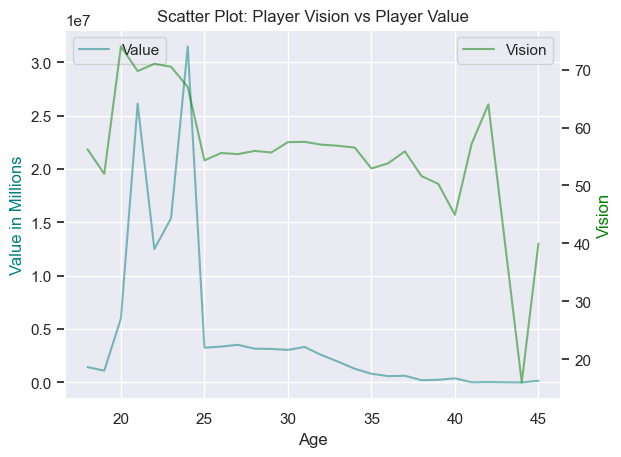

In [32]:
#vv = df.groupby('Age')['Vision','Value'].mean().reset_index()
#vv = df.loc[df['Nationality'] == 'Argentina']
adf = df.loc[(df['Age'] >= 25) | (df['Club'] == 'FC Barcelona')]
vv = adf.groupby('Age')['Vision','Value'].mean().reset_index()
# Scatter plot for Player Vision and Player Value

# Plot 'Value' on the primary y-axis
plt.plot(vv['Age'], vv['Value'], alpha=0.5, color='teal', label='Value')
plt.xlabel('Age')
plt.ylabel('Value in Millions', color='teal')
plt.legend(loc='upper left')

# Create a secondary y-axis
ax2 = plt.twinx()

# Plot 'Vision' on the secondary y-axis
ax2.plot(vv['Age'], vv['Vision'], alpha=0.5, color='green', label='Vision')
ax2.set_ylabel('Vision', color='green')
plt.legend(loc='upper right')
plt.grid()
plt.title('Scatter Plot: Player Vision vs Player Value')
plt.show()

In [33]:
adf['Vision'].corr(adf['Value'])

0.33004769907734993

C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_20796\4010445496.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vv = df.groupby('Age')['Vision','Value'].mean().reset_index()


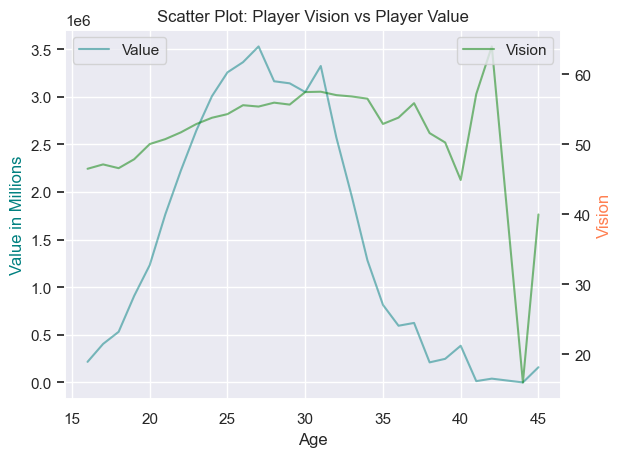

In [34]:
#vv = df.groupby('Age')['Vision','Value'].mean().reset_index()
#vv = df.loc[df['Nationality'] == 'Argentina']
vv = df.groupby('Age')['Vision','Value'].mean().reset_index()
# Scatter plot for Player Vision and Player Value

# Plot 'Value' on the primary y-axis
plt.plot(vv['Age'], vv['Value'], alpha=0.5, color='teal', label='Value')
plt.xlabel('Age')
plt.ylabel('Value in Millions', color='teal')
plt.legend(loc='upper left')

# Create a secondary y-axis
ax2 = plt.twinx()

# Plot 'Vision' on the secondary y-axis
ax2.plot(vv['Age'], vv['Vision'], alpha=0.5, color='green', label='Vision')
ax2.set_ylabel('Vision', color='coral')
plt.legend(loc='upper right')
plt.grid()
plt.title('Scatter Plot: Player Vision vs Player Value')
plt.show()

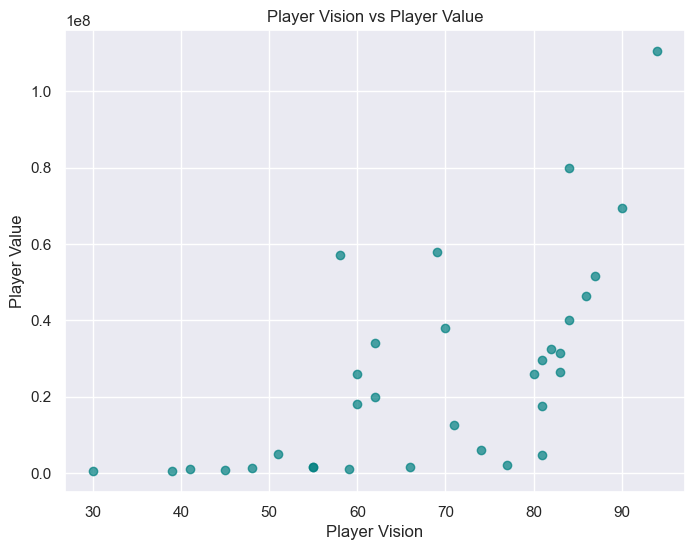

In [35]:
cl = df.loc[df['Club'] == 'FC Barcelona']
#cl = df.copy()
plt.figure(figsize=(8, 6))
plt.scatter(cl['Vision'], cl['Value'], alpha=0.7, color='teal')
plt.title('Player Vision vs Player Value')
plt.xlabel('Player Vision')
plt.ylabel('Player Value')
plt.grid(True)
plt.show()

C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_20796\3071792701.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vv = cl.groupby('Age')['Vision','Value'].mean().reset_index()


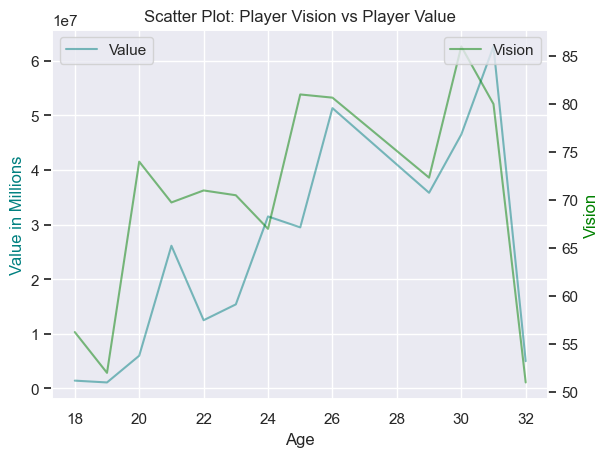

In [36]:
vv = cl.groupby('Age')['Vision','Value'].mean().reset_index()
# Scatter plot for Player Vision and Player Value

# Plot 'Value' on the primary y-axis
plt.plot(vv['Age'], vv['Value'], alpha=0.5, color='teal', label='Value')
plt.xlabel('Age')
plt.ylabel('Value in Millions', color='teal')
plt.legend(loc='upper left')

# Create a secondary y-axis
ax2 = plt.twinx()

# Plot 'Vision' on the secondary y-axis
ax2.plot(vv['Age'], vv['Vision'], alpha=0.5, color='green', label='Vision')
ax2.set_ylabel('Vision', color='green')
plt.legend(loc='upper right')
plt.grid()
plt.title('Scatter Plot: Player Vision vs Player Value')
plt.show()

In [37]:
cl['Vision'].corr(cl['Value'])

0.6365180199511142

##### Queston: Summarise your findings from the visual

##### Answer: From above analysis, we can observe that good positive correlation between Player Vision and Player Value which suggests that Player Value is not solely dependent on Vision but this contributes to the Player Value.

##### Question: The reason for selecting the chart type you did.


##### Answer: Using a line plot with dual y-axes for correlation analysis has certain advantages and use cases. Here are some uses of employing this visualization technique for correlation analysis:

Visualizing Trends: A line plot with dual y-axes allows you to visualize the trends of two variables simultaneously. This is specially useful when exploring how changes in one variable correspond to changes in another over time.

Correlation Assessment: By observing the patterns in both variables on the same plot, you can qualitatively assess the correlation between them. Similar trends or patterns may indicate a positive correlation, while divergent patterns may suggest a lack of  correlation or a negative correlation.

##### Question6: Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual

##### Question: To find best players from each positions with their Age, Nationality, Club based on their potential scores

In [38]:
bp = df[['Name','Age','Nationality','Club','Position','Overall']]

In [39]:
df['Club'].isna().value_counts()

False    17966
True       241
Name: Club, dtype: int64

In [40]:
df['Club'] = df['Club'].fillna('None')

In [41]:
df = df.drop_duplicates(subset='Name')
df.shape

(17194, 89)

##### Question: Is there a relationship between the average player value and the average overall rating for each club?

In [42]:
import plotly.express as px

# Scatter plot to explore the relationship between average player value and average overall rating for each club
avg_values = df.groupby('Club')['Value', 'Overall'].mean().reset_index()

# Assuming avg_values is already defined
# avg_values = df.groupby('Club')['Value', 'Overall'].mean().reset_index()

# Scatter plot with Plotly
fig = px.scatter(avg_values, x='Value', y='Overall', color='Club', size='Value',
                 title='Interactive Scatter Plot: Average Player Value vs Average Overall Rating by Club',
                 labels={'Value': 'Average Player Value', 'Overall': 'Average Overall Rating'},
                 size_max=30)

# Show the plot
fig.show()

C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_20796\4154769302.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_values = df.groupby('Club')['Value', 'Overall'].mean().reset_index()


##### Question: Summarise your findings from the visual.

##### Answer: From the above, we can observe that the Average Value of the Player increases along with an increaase in Average Rating of the Player. 

In the above visual represents x-axis represents Average Player Value, Y-axis represents Average Player Vision and Size of the Bubble represents Average Value of the Club.

##### Question: The reason for selecting the chart type you did

##### Answer: The scatter plot was chosen as the chart type for several reasons:

Visualizing Relationships: A scatter plot is effective for visualizing the relationship between two continuous variables, in this case, 'Age' and 'Overall Ratings.' Each point on the plot represents a player, making it easy to observe patterns and trends.

Identification of Trends: Scatter plots are excellent for identifying trends and patterns in data. The upward trend in the scatter plot indicates a positive correlation, suggesting a relationship between increasing age and higher overall ratings.

Handling Continuous Data: Both 'Value' and 'Overall Ratings' are continuous variables. Scatter plots are particularly suitable for visualizing the distribution and relationships of continuous data points.

Outlier Detection: Scatter plots provide a clear view of outliers—data points that deviate significantly from the general trend. In this case, outliers may represent players with exceptional performances for their age.

Intuitive Interpretation: Scatter plots are intuitive and widely understood, making them accessible to a broad audience, including individuals without advanced statistical knowledge.

Correlation Assessment: The scatter plot complements the correlation coefficient by providing a visual representation of the relationship. It allows for a qualitative assessment of the strength and direction of the correlation.

Data Exploration: Scatter plots are valuable for exploring data distributions and gaining insights into the variability of the dataset. They help in understanding the overall structure and characteristics of the data.

Communication of Findings: The scatter plot communicates findings in a straightforward manner, allowing for easy presentation and discussion of insights with stakeholders.

#### Important Insights

##### Positional Impact on Player Ratings:

The analysis of 'Player Overall Ratings' across different positions reveals that certain positions consistently have higher median ratings. This insight can guide CXOs in strategic decision-making, helping them prioritize positions critical for team performance. Allocating resources and investments strategically to key positions may enhance overall team competitiveness.

##### Identification of Outliers:

Outliers in player ratings across positions provide insights into exceptional player performances or areas where player ratings deviate significantly from the norm. CXOs can leverage this information to identify and potentially invest in standout players or address challenges in specific positions. Addressing outliers strategically can contribute to overall team improvement.

##### Age and Overall Rating Trends:

Exploring the relationship between player age and overall ratings reveals trends that can guide talent management strategies. CXOs can use this information to plan for the team's future by identifying age groups with potential for improvement or considering recruitment strategies that align with the team's long-term goals.

##### Potential vs. Overall Rating Comparison:

The comparison between 'Potential' and 'Overall Ratings' provides insights into how player performance evolves over time. Understanding the potential growth of players and how it aligns with their current overall ratings can inform decisions related to player development, contract extensions, or strategic recruitment to ensure a balance between short-term and long-term team goals.

##### Player Vision and Value Relationship:

Analyzing the relationship between 'Player Vision' and 'Player Value' helps CXOs understand the factors influencing player valuation. This insight can guide negotiations, contract renewals, and investment decisions. CXOs can focus on enhancing player attributes that contribute significantly to overall player value, leading to more informed decisions in player transactions and contract negotiations.